In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
# Load dataset
file_path = "Stock_Features_Complete.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Select a stock for testing (change ticker as needed)
ticker = "A UN Equity"  # Replace with any stock ticker from your dataset
df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

# Drop NaN values in Log Returns
log_returns = df_stock["Log_Return"].dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(log_returns)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] < 0.05:
    print("✅ Log returns are stationary (Proceed with ARIMA)")
else:
    print("❌ Log returns are non-stationary (Consider differencing)")

ADF Statistic: -8.308112042010302
p-value: 3.854171150469278e-13
✅ Log returns are stationary (Proceed with ARIMA)


# Run ARIMA on all stocks

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = "Stock_Features_Complete.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Get unique tickers
tickers = df_long["Ticker"].unique()

# Dictionary to store ARIMA results
arima_results = {}

print("\n🔍 Running ARIMA Modeling for All Stocks...\n")

# Loop through each ticker and apply ARIMA
for ticker in tickers:
    df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")
    
    # Drop NaN values in Log Returns
    log_returns = df_stock["Log_Return"].dropna()
    
    # Skip tickers with insufficient data
    if len(log_returns) < 30:
        arima_results[ticker] = {"status": "Insufficient data (Skipping)"}
        continue
    
    # Step 1️⃣ Perform the Augmented Dickey-Fuller (ADF) test
    adf_result = adfuller(log_returns)
    p_value = adf_result[1]
    
    # Step 2️⃣ Check stationarity
    if p_value < 0.05:
        arima_results[ticker] = {"status": "Stationary (ARIMA can be applied directly)"}
        d_value = 0  # No differencing needed
    else:
        arima_results[ticker] = {"status": "Non-stationary (Differencing needed)"}
        d_value = 1  # Differencing required
    
    # Step 3️⃣ Fit ARIMA model
    try:
        model = ARIMA(log_returns, order=(1, d_value, 1))  # Using (p=1, d=d_value, q=1)
        model_fit = model.fit()
        
        # Step 4️⃣ Forecast next 5 periods
        forecast_steps = 5
        forecast = model_fit.forecast(steps=forecast_steps)
        
        # Step 5️⃣ Convert predicted log returns to stock prices
        last_known_price = df_stock["Closing_Price"].iloc[-1]
        predicted_prices = [last_known_price * np.exp(sum(forecast[:i])) for i in range(1, forecast_steps + 1)]
        
        # Store results
        arima_results[ticker]["forecast"] = predicted_prices
    
    except Exception as e:
        arima_results[ticker]["error"] = str(e)

# Step 6️⃣ Display results
print("\n✅ ARIMA Results Summary:\n")
for ticker, result in arima_results.items():
    print(f"📊 Ticker: {ticker}")
    print(f"   - Status: {result['status']}")
    if "forecast" in result:
        print(f"   - Predicted Prices (Next 5 periods): {result['forecast']}")
    if "error" in result:
        print(f"   - Error: {result['error']}")
    print("----------------------------------------------------")



🔍 Running ARIMA Modeling for All Stocks...



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will b


✅ ARIMA Results Summary:

📊 Ticker: A UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [133.72151819449888, 131.91453885347156, 135.499308683534, 135.313482808053, 137.8100171543411]
----------------------------------------------------
📊 Ticker: AAPL UW Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [249.56834533925556, 254.40154839266032, 260.76920697591004, 266.62859747951063, 272.9275637039778]
----------------------------------------------------
📊 Ticker: ABBV UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [210.95062164747557, 213.14828494912766, 215.56730860998368, 218.16573395376747, 220.91187245162357]
----------------------------------------------------
📊 Ticker: ABT UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [138.0043392978864, 138.6069246179679

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fr

# Backtesting

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_5701/2392474291.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices.append(predicted_prices[-1] * np.exp(foreca


📊 Ticker: A UN Equity
   - Status: Backtest completed
   - RMSE: 7.5301
   - MAE: 6.9074

📊 Ticker: AAPL UW Equity
   - Status: Backtest completed
   - RMSE: 27.4573
   - MAE: 24.4008

📊 Ticker: ABBV UN Equity
   - Status: Backtest completed
   - RMSE: 13.1397
   - MAE: 11.8325

📊 Ticker: ABT UN Equity
   - Status: Backtest completed
   - RMSE: 10.3735
   - MAE: 9.1357

📊 Ticker: ACGL UW Equity
   - Status: Backtest completed
   - RMSE: 10.2623
   - MAE: 8.8285

📊 Ticker: ACN UN Equity
   - Status: Backtest completed
   - RMSE: 82.4889
   - MAE: 77.1696

📊 Ticker: ADBE UW Equity
   - Status: Backtest completed
   - RMSE: 201.6906
   - MAE: 189.5437

📊 Ticker: ADI UW Equity
   - Status: Backtest completed
   - RMSE: 16.9806
   - MAE: 13.0521

📊 Ticker: ADM UN Equity
   - Status: Backtest completed
   - RMSE: 15.3135
   - MAE: 14.4356

📊 Ticker: ADP UW Equity
   - Status: Backtest completed
   - RMSE: 13.8531
   - MAE: 11.3745

📊 Ticker: ADSK UW Equity
   - Status: Backtest completed
  

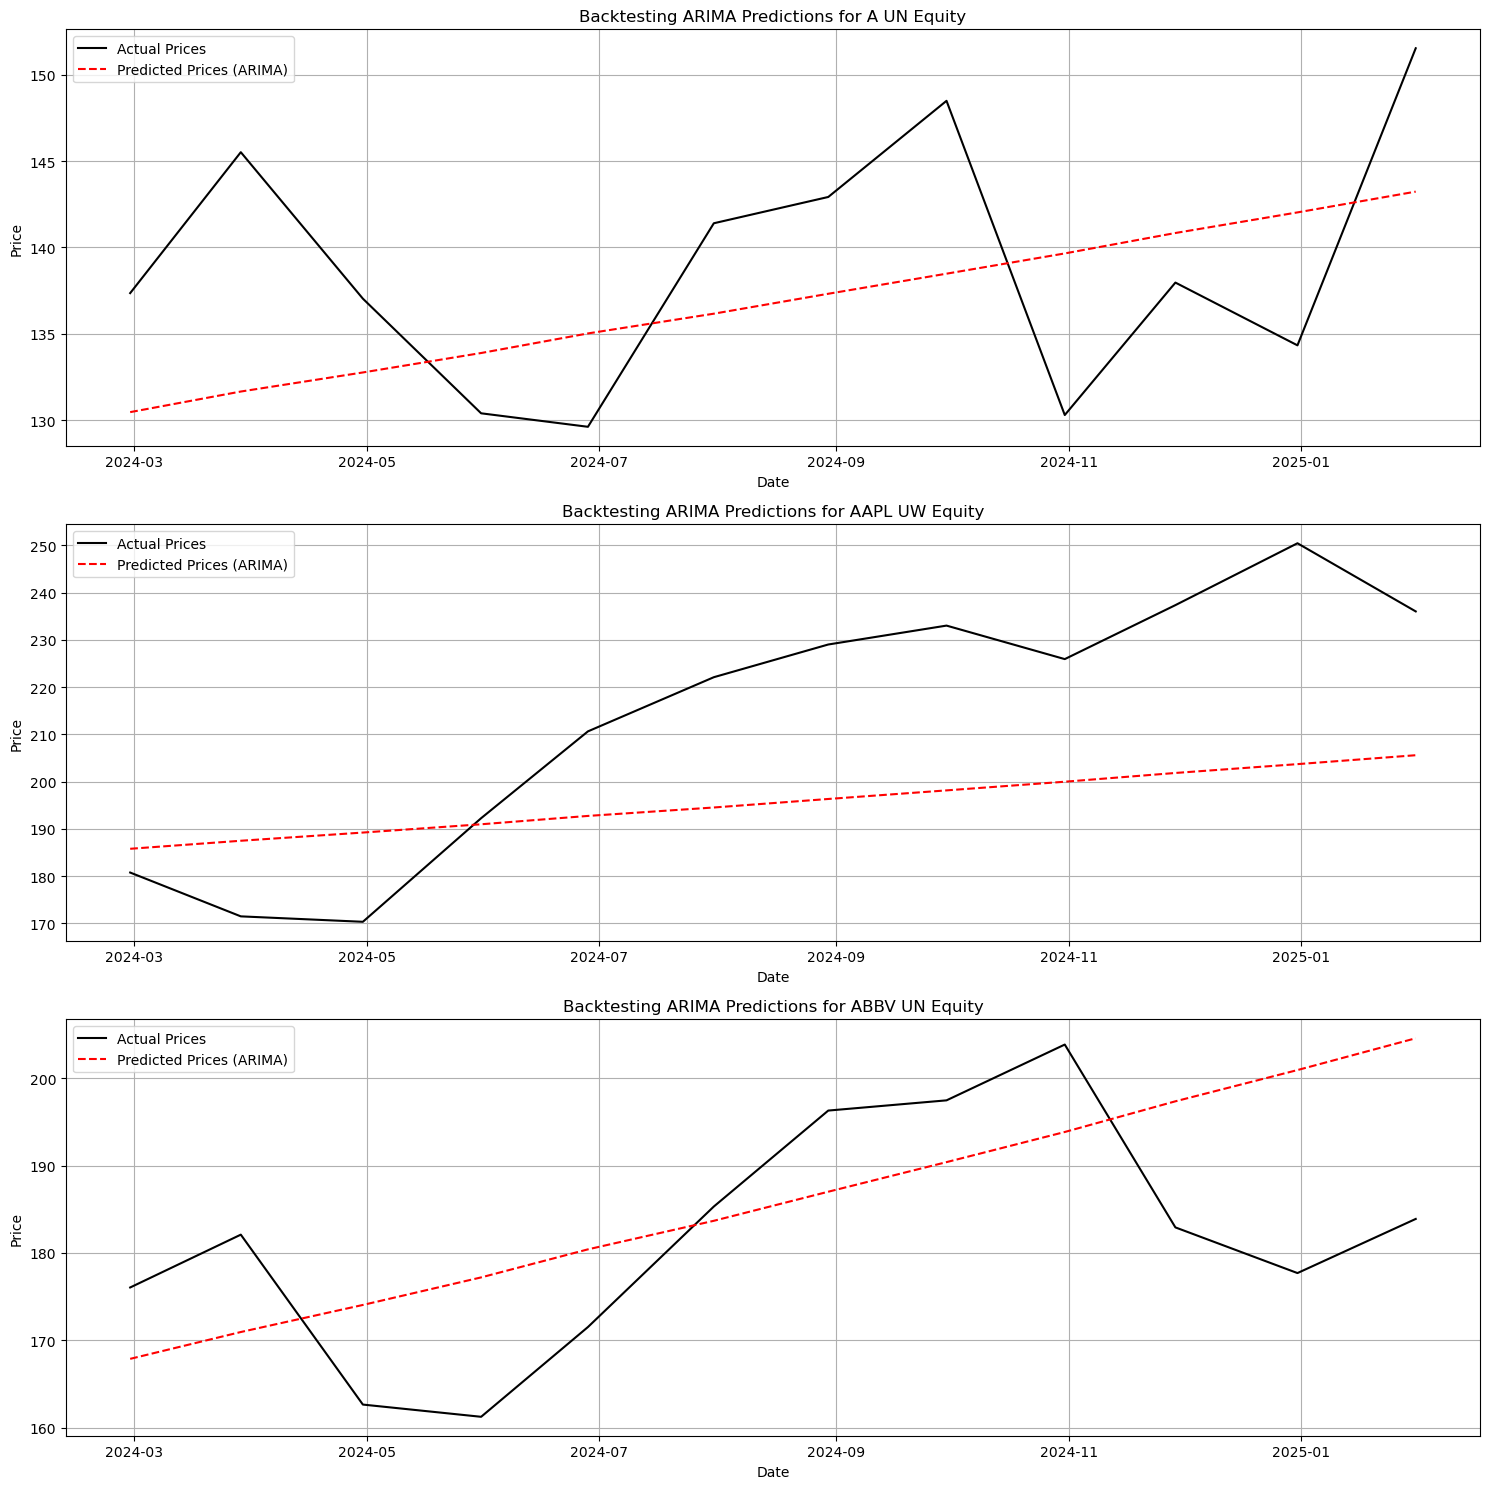

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "Stock_Features_Complete.xlsx"  # Ensure this file is present
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Dictionary to store backtest results for all tickers
backtest_results = {}

# Loop through each ticker and perform backtesting
for ticker in df_long["Ticker"].unique():
    df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

    # Drop NaN values in Log Returns
    log_returns = df_stock["Log_Return"].dropna()

    # Skip tickers with insufficient data
    if len(log_returns) < 30:
        backtest_results[ticker] = {"status": "Insufficient data (Skipping)"}
        continue

    # Split Data: 80% Training, 20% Testing
    split_index = int(len(log_returns) * 0.8)
    train_data, test_data = log_returns[:split_index], log_returns[split_index:]

    # Fit ARIMA Model on Training Data
    try:
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast for Test Data
        forecast_steps = len(test_data)
        forecast = model_fit.forecast(steps=forecast_steps)

        # Convert Forecasted Log Returns to Prices
        last_train_price = df_stock["Closing_Price"].iloc[split_index - 1]

        # Ensure predicted prices array matches the length of actual prices
        predicted_prices = [last_train_price]
        for i in range(1, forecast_steps + 1):
            predicted_prices.append(predicted_prices[-1] * np.exp(forecast[i - 1]))

        # Drop the first element to match actual_prices length
        predicted_prices = predicted_prices[1:]

        # Ensure lengths match before evaluating
        actual_prices = df_stock["Closing_Price"].iloc[split_index : split_index + forecast_steps]

        # Compute RMSE & MAE
        rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
        mae = mean_absolute_error(actual_prices, predicted_prices)

        backtest_results[ticker] = {
            "status": "Backtest completed",
            "RMSE": rmse,
            "MAE": mae,
            "Actual Prices": actual_prices.values,
            "Predicted Prices": predicted_prices,
            "Test Dates": actual_prices.index
        }

    except Exception as e:
        backtest_results[ticker] = {"status": "Error", "error_message": str(e)}

# Display results summary
for ticker, result in backtest_results.items():
    print(f"\n📊 Ticker: {ticker}")
    print(f"   - Status: {result['status']}")
    if "RMSE" in result:
        print(f"   - RMSE: {result['RMSE']:.4f}")
        print(f"   - MAE: {result['MAE']:.4f}")
    if "error_message" in result:
        print(f"   - Error: {result['error_message']}")

# Visualization of a few selected tickers
selected_tickers = list(backtest_results.keys())[:3]  # Select first 3 tickers for visualization

plt.figure(figsize=(15, 5 * len(selected_tickers)))

for i, ticker in enumerate(selected_tickers, 1):
    if "Actual Prices" in backtest_results[ticker]:  # Only visualize successful backtests
        plt.subplot(len(selected_tickers), 1, i)
        plt.plot(backtest_results[ticker]["Test Dates"], backtest_results[ticker]["Actual Prices"], label="Actual Prices", color="black")
        plt.plot(backtest_results[ticker]["Test Dates"], backtest_results[ticker]["Predicted Prices"], label="Predicted Prices (ARIMA)", linestyle="dashed", color="red")

        plt.title(f"Backtesting ARIMA Predictions for {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()


# Compute expected returns for these 5 months

In [4]:
import numpy as np
import pandas as pd

# Define the forecast horizon (e.g., 5 months)
forecast_horizon = 5

# Extract forecasted log returns for each stock
expected_returns = {}
for ticker, result in backtest_results.items():
    if "Predicted Prices" in result:
        # Compute average predicted log return for next `forecast_horizon` months
        avg_log_return = np.mean(np.diff(np.log(result["Predicted Prices"][:forecast_horizon])))
        expected_returns[ticker] = avg_log_return

# Convert to DataFrame
expected_returns_df = pd.DataFrame.from_dict(expected_returns, orient='index', columns=['Expected_Log_Return'])

# Convert log returns to normal returns (for portfolio calculations)
expected_returns_df["Expected_Return"] = np.exp(expected_returns_df["Expected_Log_Return"]) - 1

print("\n📊 Expected Returns for Portfolio Optimization:\n")
print(expected_returns_df)



📊 Expected Returns for Portfolio Optimization:

                Expected_Log_Return  Expected_Return
A UN Equity                0.008571         0.008607
AAPL UW Equity             0.009187         0.009229
ABBV UN Equity             0.018010         0.018173
ABT UN Equity              0.010759         0.010817
ACGL UW Equity             0.025772         0.026107
...                             ...              ...
XYL UN Equity              0.015863         0.015989
YUM UN Equity              0.009422         0.009466
ZBH UN Equity              0.001791         0.001792
ZBRA UW Equity             0.002824         0.002828
ZTS UN Equity              0.010775         0.010833

[479 rows x 2 columns]


In [5]:
# Merge Expected Returns with Backtest Results
backtest_results_df = pd.DataFrame.from_dict(backtest_results, orient='index')

# Ensure only successfully backtested stocks are selected
backtest_results_df = backtest_results_df[backtest_results_df["status"] == "Backtest completed"]

# Merge with expected returns
backtest_results_df = backtest_results_df.merge(expected_returns_df, left_index=True, right_index=True)

# Compute risk-adjusted return (Expected Return / RMSE)
backtest_results_df["Risk_Adjusted_Return"] = backtest_results_df["Expected_Return"] / backtest_results_df["RMSE"]

# Select top N stocks based on risk-adjusted return
top_n = 50  # You can adjust the number of stocks to include
selected_stocks_df = backtest_results_df.sort_values(by="Risk_Adjusted_Return", ascending=False).head(top_n)

# Get list of selected tickers
selected_tickers = selected_stocks_df.index.tolist()

print("\n📊 Selected Stocks for Portfolio Optimization:\n")
print(selected_tickers)



📊 Selected Stocks for Portfolio Optimization:

['PCG UN Equity', 'GM UN Equity', 'CNP UN Equity', 'NWS UW Equity', 'ROL UN Equity', 'NWSA UW Equity', 'PNR UN Equity', 'L UN Equity', 'TSCO UW Equity', 'CPRT UW Equity', 'EQT UN Equity', 'SYF UN Equity', 'CTRA UN Equity', 'ANET UN Equity', 'TPR UN Equity', 'KKR UN Equity', 'CMG UN Equity', 'JPM UN Equity', 'TRMB UW Equity', 'APH UN Equity', 'SPG UN Equity', 'JNPR UN Equity', 'WRB UN Equity', 'AVGO UW Equity', 'IR UN Equity', 'FITB UW Equity', 'HPE UN Equity', 'HLT UN Equity', 'NCLH UN Equity', 'MAS UN Equity', 'NVDA UW Equity', 'CSX UW Equity', 'OKE UN Equity', 'ACGL UW Equity', 'AIG UN Equity', 'HBAN UW Equity', 'OTIS UN Equity', 'AFL UN Equity', 'BX UN Equity', 'EBAY UW Equity', 'CTAS UW Equity', 'HIG UN Equity', 'GE UN Equity', 'FAST UW Equity', 'COF UN Equity', 'PFG UW Equity', 'FTNT UW Equity', 'RSG UN Equity', 'MET UN Equity', 'CF UN Equity']


In [6]:
# Extract historical log returns for the selected stocks
historical_log_returns = df_long.pivot(index="Date", columns="Ticker", values="Log_Return")

# Compute covariance matrix for selected stocks
cov_matrix = historical_log_returns[selected_tickers].cov()

print("\n📊 Covariance Matrix of Selected Stocks:\n")
print(cov_matrix)



📊 Covariance Matrix of Selected Stocks:

Ticker          PCG UN Equity  GM UN Equity  CNP UN Equity  NWS UW Equity  \
Ticker                                                                      
PCG UN Equity        0.009373      0.003831       0.001846       0.002744   
GM UN Equity         0.003831      0.011260       0.002440       0.005200   
CNP UN Equity        0.001846      0.002440       0.003328       0.001561   
NWS UW Equity        0.002744      0.005200       0.001561       0.007693   
ROL UN Equity        0.000836      0.001375       0.001701       0.001096   
NWSA UW Equity       0.002943      0.005444       0.001601       0.007668   
PNR UN Equity        0.001502      0.004292       0.001447       0.002929   
L UN Equity          0.001461      0.002192       0.001079       0.002193   
TSCO UW Equity       0.001745      0.002309       0.001461       0.002666   
CPRT UW Equity       0.001959      0.003256       0.001919       0.002992   
EQT UN Equity        0.003936     

In [7]:
import scipy.optimize as sco

# Extract expected returns as numpy array
selected_expected_returns = selected_stocks_df["Expected_Return"].values

# Define function to calculate portfolio performance
def portfolio_performance(weights, expected_returns, cov_matrix):
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Define function to maximize Sharpe Ratio
def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_return, port_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return - (port_return - risk_free_rate) / port_volatility  # Maximize Sharpe Ratio

# Initial weights (equal distribution)
num_selected_stocks = len(selected_tickers)
init_guess = np.array(num_selected_stocks * [1.0 / num_selected_stocks])

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: Each weight between 0% and 100%
bounds = tuple((0, 1) for _ in range(num_selected_stocks))

# Optimize Portfolio
optimal_portfolio = sco.minimize(neg_sharpe_ratio, init_guess, args=(selected_expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = optimal_portfolio.x

# Store results
selected_stocks_df["Optimal_Weight"] = optimal_weights

print("\n📊 Optimized Portfolio Allocation:\n")
print(selected_stocks_df[["Expected_Return", "Optimal_Weight"]])



📊 Optimized Portfolio Allocation:

                Expected_Return  Optimal_Weight
PCG UN Equity          0.013163    0.000000e+00
GM UN Equity           0.025657    0.000000e+00
CNP UN Equity          0.011350    0.000000e+00
NWS UW Equity          0.042709    1.023437e-16
ROL UN Equity          0.012775    0.000000e+00
NWSA UW Equity         0.041847    0.000000e+00
PNR UN Equity          0.037637    0.000000e+00
L UN Equity            0.016490    0.000000e+00
TSCO UW Equity         0.021950    2.693996e-16
CPRT UW Equity         0.024632    0.000000e+00
EQT UN Equity          0.021103    3.130866e-16
SYF UN Equity          0.031470    0.000000e+00
CTRA UN Equity         0.007868    1.136047e-16
ANET UN Equity         0.036816    2.435781e-16
TPR UN Equity          0.031447    0.000000e+00
KKR UN Equity          0.072848    3.176722e-02
CMG UN Equity          0.043749    0.000000e+00
JPM UN Equity          0.032231    0.000000e+00
TRMB UW Equity         0.027106    0.000000e+00
APH 

In [23]:
# Build matrix of actual log returns from backtested prices
portfolio_return_matrix = pd.DataFrame()

for ticker in selected_tickers:
    actual_prices = backtest_results[ticker]["Actual Prices"]
    log_returns = np.diff(np.log(actual_prices))  # 5 monthly log returns
    portfolio_return_matrix[ticker] = pd.Series(log_returns)


In [24]:
# Align weights to columns
weights = selected_stocks_df.loc[portfolio_return_matrix.columns, "Optimal_Weight"].values
print(weights)
# Weighted portfolio log return
portfolio_return_matrix["Portfolio_LogReturn"] = portfolio_return_matrix.dot(weights)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.02343698e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.69399613e-16 0.00000000e+00 3.13086560e-16 0.00000000e+00
 1.13604709e-16 2.43578117e-16 0.00000000e+00 3.17672237e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.11039037e-16 9.80100201e-02
 2.90642477e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.99724163e-01 1.40857774e-16
 8.22476485e-17 1.64474232e-16 1.43457306e-16 9.15506469e-17
 0.00000000e+00 1.22644706e-16 8.91397926e-17 4.20530062e-17
 0.00000000e+00 9.98556330e-17 4.70498593e-01 8.04518137e-17
 0.00000000e+00 1.99150459e-16 0.00000000e+00 2.78408303e-17
 3.27187752e-16 1.37560413e-16]


In [25]:
# Risk-free rate as used in optimization
risk_free_rate = 0.02  # Annual

# Use monthly data
portfolio_log_returns = portfolio_return_matrix["Portfolio_LogReturn"]

# Annualized portfolio metrics
portfolio_annual_return = portfolio_log_returns.mean() * 12
portfolio_annual_volatility = portfolio_log_returns.std() * np.sqrt(12)
portfolio_sharpe = (portfolio_annual_return - risk_free_rate) / portfolio_annual_volatility

print(f"📊 Realized Portfolio Annual Return: {portfolio_annual_return:.4f}")
print(f"📊 Realized Portfolio Volatility: {portfolio_annual_volatility:.4f}")
print(f"📊 Realized Portfolio Sharpe Ratio: {portfolio_sharpe:.4f}")


📊 Realized Portfolio Annual Return: 0.5070
📊 Realized Portfolio Volatility: 0.1422
📊 Realized Portfolio Sharpe Ratio: 3.4255


# SP500 last 5 motnhs

In [26]:
df_sp500 = pd.read_excel('sp500_Cleaned_Processed.xlsx')
last_5_sp500_returns = df_sp500["Log_Return"].dropna().iloc[-5:]

sp500_annual_return = last_5_sp500_returns.mean() * 12
sp500_annual_volatility = last_5_sp500_returns.std() * np.sqrt(12)
sp500_sharpe = (sp500_annual_return - risk_free_rate) / sp500_annual_volatility

print(f"📈 S&P 500 Annual Return: {sp500_annual_return:.4f}")
print(f"📈 S&P 500 Volatility: {sp500_annual_volatility:.4f}")
print(f"📈 S&P 500 Sharpe Ratio: {sp500_sharpe:.4f}")

📈 S&P 500 Annual Return: 0.0787
📈 S&P 500 Volatility: 0.1168
📈 S&P 500 Sharpe Ratio: 0.5024


In [27]:
comparison_df = pd.DataFrame({
    "Metric": ["Annual Return", "Volatility", "Sharpe Ratio"],
    "Optimized Portfolio": [portfolio_annual_return, portfolio_annual_volatility, portfolio_sharpe],
    "S&P 500": [sp500_annual_return, sp500_annual_volatility, sp500_sharpe]
})

print("\n📊 Performance Comparison:\n")
print(comparison_df)



📊 Performance Comparison:

          Metric  Optimized Portfolio   S&P 500
0  Annual Return             0.506959  0.078670
1     Volatility             0.142155  0.116777
2   Sharpe Ratio             3.425550  0.502414


/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_5701/3178710198.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


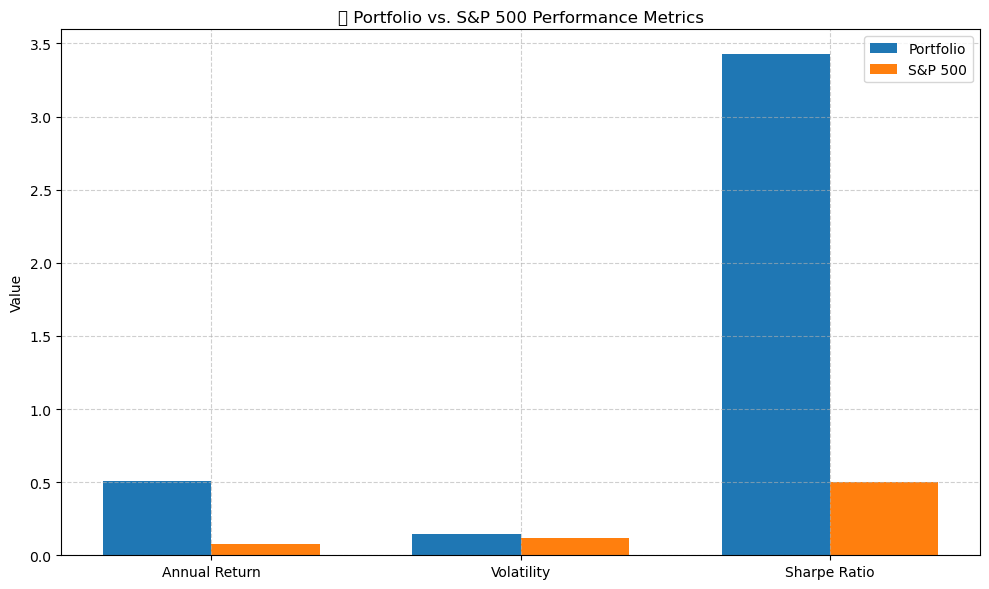

In [28]:
import matplotlib.pyplot as plt

labels = ["Annual Return", "Volatility", "Sharpe Ratio"]
portfolio_vals = [portfolio_annual_return, portfolio_annual_volatility, portfolio_sharpe]
sp500_vals = [sp500_annual_return, sp500_annual_volatility, sp500_sharpe]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, portfolio_vals, width, label='Portfolio')
plt.bar(x + width/2, sp500_vals, width, label='S&P 500')
plt.xticks(x, labels)
plt.title("📈 Portfolio vs. S&P 500 Performance Metrics")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
comparison_df = pd.DataFrame({
    "Metric": ["Expected Return (5 months)"],
    "Optimized Portfolio": [portfolio_expected_return],
    "S&P 500": [sp500_expected_return]
})

print("\n🔍 Performance Comparison Summary:\n")
print(comparison_df)



🔍 Performance Comparison Summary:

                       Metric  Optimized Portfolio   S&P 500
0  Expected Return (5 months)             0.094089  0.006577


In [20]:
# Use same risk-free rate as in your optimization step
risk_free_rate = 0.02  # annualized

# Estimate annualized return from monthly log return
sp500_annual_return = sp500_log_return_mean * 12
sp500_annual_volatility = last_5months_sp500.std() * np.sqrt(12)

# Sharpe Ratio
sp500_sharpe = (sp500_annual_return - risk_free_rate) / sp500_annual_volatility

print(f"📉 S&P 500 Annualized Return: {sp500_annual_return:.4f}")
print(f"📉 S&P 500 Annualized Volatility: {sp500_annual_volatility:.4f}")
print(f"📈 S&P 500 Sharpe Ratio: {sp500_sharpe:.4f}")


📉 S&P 500 Annualized Return: 0.0787
📉 S&P 500 Annualized Volatility: 0.1168
📈 S&P 500 Sharpe Ratio: 0.5024


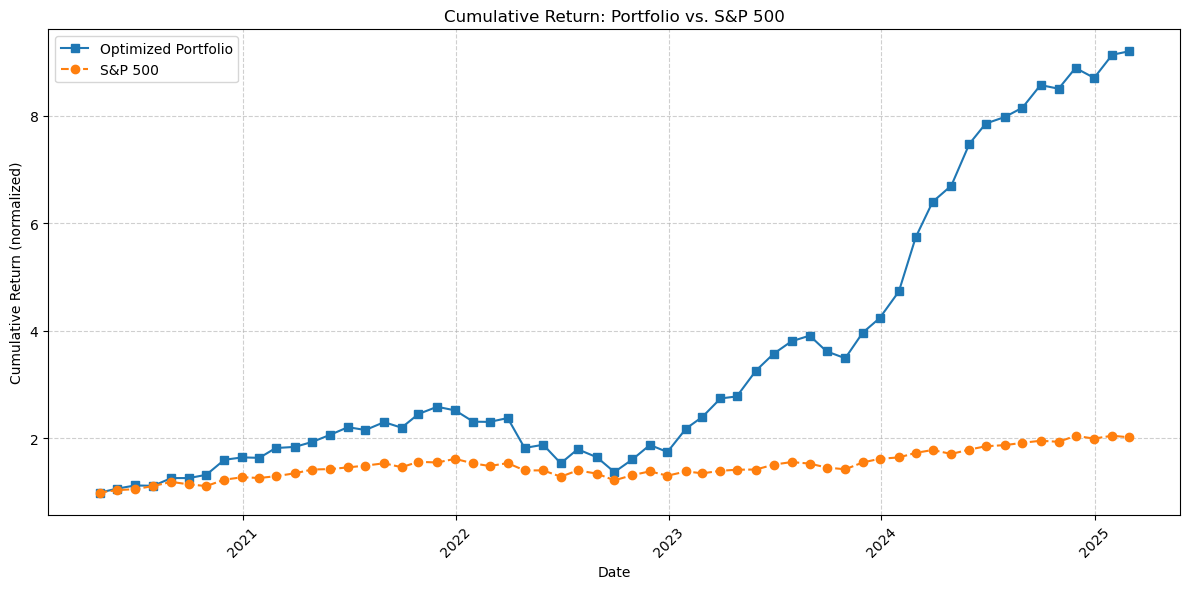

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Portfolio cumulative returns ===
# df_long should contain log returns for each selected ticker
# selected_tickers: list of tickers in portfolio
# selected_stocks_df: contains optimal weights in the same order

# Create pivot: rows = Date, columns = Ticker
returns_matrix = df_long[df_long["Ticker"].isin(selected_tickers)] \
    .pivot(index="Date", columns="Ticker", values="Log_Return") \
    .dropna()

# Align weights
weights = selected_stocks_df.loc[returns_matrix.columns, "Optimal_Weight"].values

# Portfolio log returns
returns_matrix["Portfolio_LogReturn"] = returns_matrix.dot(weights)
returns_matrix["Portfolio_Cumulative"] = np.exp(returns_matrix["Portfolio_LogReturn"].cumsum())

# === Step 2: S&P 500 cumulative returns ===
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"])
df_sp500 = df_sp500.set_index("Date").sort_index()
df_sp500["SP500_Cumulative"] = np.exp(df_sp500["Log_Return"].dropna().cumsum())

# === Step 3: Merge for plotting ===
df_compare = returns_matrix[["Portfolio_Cumulative"]].merge(
    df_sp500[["SP500_Cumulative"]],
    left_index=True, right_index=True, how="inner"
)

# === Step 4: Plot ===
plt.figure(figsize=(12, 6))
plt.plot(df_compare.index, df_compare["Portfolio_Cumulative"], label="Optimized Portfolio", marker='s')
plt.plot(df_compare.index, df_compare["SP500_Cumulative"], label="S&P 500", linestyle='--', marker='o')
plt.title("Cumulative Return: Portfolio vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (normalized)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Get test dates (assuming all stocks were backtested over same period)
test_dates = backtest_results[selected_tickers[0]]["Test Dates"]

# Build a matrix of actual prices for selected tickers
actual_price_matrix = pd.DataFrame(index=test_dates)

for ticker in selected_tickers:
    actual_price_matrix[ticker] = backtest_results[ticker]["Actual Prices"]

# Get weights in the same order
weights = selected_stocks_df.loc[selected_tickers, "Optimal_Weight"].values

# Normalize each stock to start at 1
normalized_prices = actual_price_matrix / actual_price_matrix.iloc[0]

# Compute portfolio value by weighted sum of normalized prices
portfolio_value = normalized_prices.dot(weights)

# Create a DataFrame for plotting
portfolio_vs_sp500 = pd.DataFrame({
    "Date": test_dates,
    "Portfolio_Realized": portfolio_value.values
})
portfolio_vs_sp500.set_index("Date", inplace=True)


In [18]:
print(portfolio_vs_sp500)

            Portfolio_Realized
Date                          
2024-02-29            1.000000
2024-03-29            1.115340
2024-04-30            1.173123
2024-05-31            1.308274
2024-06-28            1.376991
2024-07-31            1.392258
2024-08-30            1.422468
2024-09-30            1.494917
2024-10-31            1.489360
2024-11-29            1.558298
2024-12-31            1.528232
2025-01-31            1.592913


In [19]:
print(test_dates)

DatetimeIndex(['2024-02-29', '2024-03-29', '2024-04-30', '2024-05-31',
               '2024-06-28', '2024-07-31', '2024-08-30', '2024-09-30',
               '2024-10-31', '2024-11-29', '2024-12-31', '2025-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)
